# Chapter 8. Dimensionality Reduction

[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> Reducing dimensionality does cause some **information loss** (just like compressing an image to JPEG can degrade its quality), so even though it will **speed up training**, it may make your system **perform slightly worse**. It also makes your pipelines a bit more complex and thus harder to maintain. So, if training is too slow, you should first try to train your system with the original data before considering using dimensionality reduction. In some cases, reducing the dimensionality of the training data may **filter out some noise and unnecessary details** and thus result in **higher performance**, but in general it won’t; it will just speed up training.

Apart from speeding up training, dimensionality reduction is also **extremely useful for data visualization** (or DataViz). Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such as clusters. Moreover, DataViz is essential to communicate your conclusions to people who are not data scientists—in particular, decision makers who will use your results.

Here is a more troublesome difference: if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly $0.52$. If you pick two random points in a unit 3D cube, the average distance will be roughly $0.66$. But what about two points picked randomly in a $1,000,000$-dimensional hypercube? The average distance, believe it or not, will be about $408.25$ (roughly $\sqrt{1,000,000/6}$)! This is counterintuitive: how can two points be so far apart when they both lie within the same unit hypercube? Well, there’s just plenty of space in high dimensions. As a result, **high-dimensional datasets are at risk of being very sparse**: most training instances are likely to be far away from each other. **This also means that a new instance will likely be far away from any training instance**, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations. In short, the **more dimensions the training set has, the greater the risk of overfitting** it.



## Main Approaches for Dimensionality Reduction

projection and Manifold Learning

### Projection

In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated (as discussed earlier for MNIST). As a result, all training instances **lie within (or close to) a much lower-dimensional subspace** of the high-dimensional space. This sounds very abstract, so let’s look at an example

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0802.png)

Notice that all training instances lie close to a plane: this is a **lower-dimensional (2D) subspace** of the high-dimensional (3D) space. If we project every training instance perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), we get the new 2D dataset shown in Figure 8-3. Ta-da! We have just reduced the dataset’s dimensionality from 3D to 2D. Note that the axes correspond to new features z1 and z2 (the coordinates of the projections on the plane).

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0803.png)

However, **projection is not always the best approach to dimensionality reduction**. In many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset represented in Figure 8-4

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0804.png)

Simply projecting onto a plane (e.g., by dropping x3) would **squash different layers of the Swiss roll together**, as shown on the left side of Figure 8-5. What you really want is to unroll the Swiss roll to obtain the 2D dataset on the right side of Figure 8-5.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0805.png)

### Manifold Learning

The Swiss roll is an example of a **2D manifold**. Put simply, a 2D manifold is a 2D shape that can be **bent and twisted in a higher-dimensional space**. More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: **it locally resembles a 2D plane, but it is rolled in the third dimension**.

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called **Manifold Learning**. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most **real-world high-dimensional datasets lie close to a much lower-dimensional manifold**. This assumption is very often empirically observed.

The manifold assumption is often accompanied by another implicit assumption: **that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold**. For example, in the top row of Figure 8-6 the Swiss roll is split into two classes: in the 3D space (on the left), the decision boundary would be fairly complex, but in the 2D unrolled manifold space (on the right), the decision boundary is a straight line.

However, this implicit assumption does not always hold. For example, in the bottom row of Figure 8-6, the decision boundary is located at x1 = 5. This decision boundary looks very simple in the original 3D space (a vertical plane), but it looks more complex in the unrolled manifold (a collection of four independent line segments).

In short, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0806.png)

## PCA

**Principal Component Analysis (PCA)** is by far the most popular dimensionality reduction algorithm. First it **identifies the hyperplane that lies closest to the data**, and then it projects the data onto it, just like in Figure 8-2

### Preserving the Variance

Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane. For example, a simple 2D dataset is represented on the left in Figure 8-7, along with three different axes (i.e., 1D hyperplanes). On the right is the result of the projection of the dataset onto each of these axes. As you can see, the projection onto the **solid line preserves the maximum variance**, while the projection onto the dotted line preserves very little variance and the projection onto the dashed line preserves an intermediate amount of variance.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0807.png)

It seems reasonable to **select the axis that preserves the maximum amount of variance**, as it will most likely lose less information than the other projections. Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is the rather simple idea behind PCA.

### Principal Components

PCA identifies the **axis that accounts for the largest amount of variance** in the training set. In Figure 8-7, it is the solid line. It also finds a second axis, **orthogonal to the first one**, that accounts for the **largest amount of remaining variance**. In this 2D example there is no choice: it is the dotted line. If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on—as many axes as the number of dimensions in the dataset.

The $i$-th axis is called the $i$-th **principal component (PC)** of the data. In Figure 8-7, the first PC is the axis on which vector c1 lies, and the second PC is the axis on which vector c2 lies. In Figure 8-2 the first two PCs are the orthogonal axes on which the two arrows lie, on the plane, and the third PC is the axis orthogonal to that plane.

### Projecting Down to d Dimensions

Once you have identified all the principal components, you can **reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components**. Selecting this hyperplane ensures that the projection will preserve as much variance as possible. For example, in Figure 8-2 the 3D dataset is projected down to the 2D plane defined by the first two principal components, preserving a large part of the dataset’s variance. As a result, the 2D projection looks very much like the original 3D dataset.


### Using Scikit-Learn

Scikit-Learn’s `PCA` class uses **SVD decomposition** to implement PCA, just like we did earlier in this chapter. The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (note that it automatically takes care of centering the data):



In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4, n_clusters_per_class=1, class_sep=1)

<Figure size 864x432 with 0 Axes>

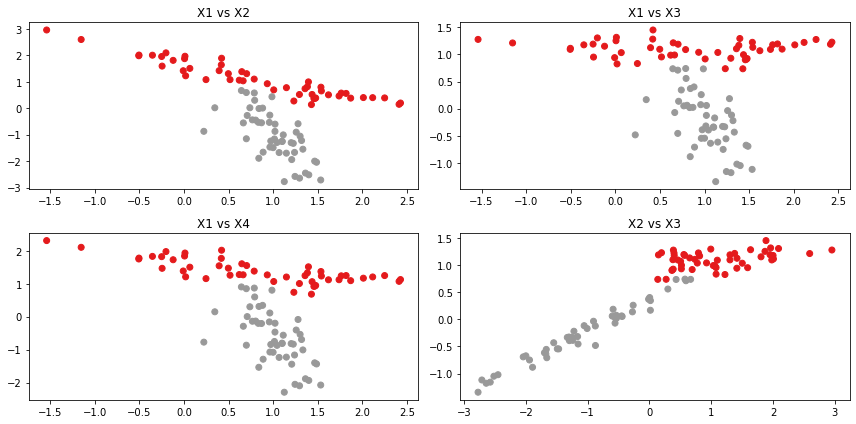

In [4]:
plt.figure(figsize=(12,6))

fig, ax = plt.subplots(2,2, figsize=(12,6))

ax[0,0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
ax[0,0].set_title("X1 vs X2")

ax[0,1].scatter(X[:,0], X[:,2], c=y, cmap=plt.cm.Set1)
ax[0,1].set_title("X1 vs X3")

ax[1,0].scatter(X[:,0], X[:,3], c=y, cmap=plt.cm.Set1)
ax[1,0].set_title("X1 vs X4")

ax[1,1].scatter(X[:,1], X[:,2], c=y, cmap=plt.cm.Set1)
ax[1,1].set_title("X2 vs X3")

plt.tight_layout()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
X2D = pca.fit_transform(X)

In [6]:
X2D.shape

(100, 4)

In [7]:
pca.components_

array([[ 0.16075882, -0.67986823, -0.3807321 , -0.6057878 ],
       [-0.91431847,  0.14600839, -0.31499047, -0.20852886],
       [ 0.21082519,  0.61731712,  0.16406004, -0.73997068],
       [-0.3061553 , -0.36794064,  0.85376131, -0.2048908 ]])

In [8]:
pd.DataFrame(pca.components_.T, columns=[f"PC{i}" for i in range(1, len(pca.components_) +1)])

,PC1,PC2,PC3,PC4
0,0.160759,-0.914318,0.210825,-0.306155
1,-0.679868,0.146008,0.617317,-0.367941
2,-0.380732,-0.314990,0.164060,0.853761
3,-0.605788,-0.208529,-0.739971,-0.204891


After fitting the PCA transformer to the dataset, its `components_` attribute holds the **transpose** of Wd (e.g., the **unit vector** that defines the first principal component is equal to `pca.components_.T[:, 0]`).

Text(0, 0.5, 'PC2')

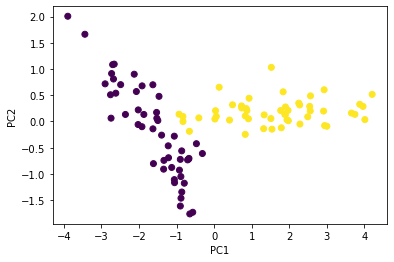

In [9]:
plt.scatter(X2D[:,0], X2D[:,1], c=y)

plt.xlabel("PC1")
plt.ylabel("PC2")

### Explained Variance Ratio

Another useful piece of information is the **explained variance ratio of each principal component**, available via the `explained_variance_ratio_` variable. The ratio indicates the proportion of the dataset’s variance that lies along each principal component. For example, let’s look at the explained variance ratios of the first two components of the 3D dataset represented in

In [10]:
pca.explained_variance_ratio_

array([8.96941704e-01, 1.03058296e-01, 2.70172747e-32, 1.58869135e-33])

This output tells you that $70.3$% of the dataset’s variance lies along the first PC, and $29.7$% lies along the second PC. This leaves less than $1.2$% for the third PC, so it is reasonable to assume that the third PC probably carries little information.

### Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that **add up to a sufficiently large portion of the variance** (e.g., 95%). Unless, of course, you are reducing dimensionality for data visualization—in that case you will want to reduce the dimensionality down to 2 or 3.

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to **preserve 95%** of the training set’s variance

In [11]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

d

2

You could then set `n_components=d` and run PCA again. But there is a **much better option**: instead of specifying the number of principal components you want to preserve, you can set `n_components` to be a float between $0.0$ and $1.0$, indicating the **ratio of variance you wish to preserve**:

In [12]:
pca = PCA(n_components=0.95)
X2D = pca.fit_transform(X)

In [13]:
pca.explained_variance_ratio_

array([0.8969417, 0.1030583])

Yet another option is to plot the **explained variance as a function of the number of dimensions** (simply plot **cumsum**; see Figure 8-8). There will usually be an **elbow in the curve**, where the explained variance stops growing fast. In this case, you can see that reducing the dimensionality down to about 100 dimensions wouldn’t lose too much explained variance

In [14]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=15, n_informative=5, n_redundant=2, n_repeated=2, n_clusters_per_class=2, class_sep=1.1)

In [15]:
X.shape

(1000, 15)

In [16]:
pca = PCA()
pca.fit(X)

PCA()

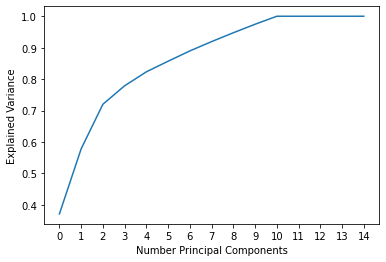

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(15))
plt.xlabel("Number Principal Components")
plt.ylabel("Explained Variance")

None

### PCA for Compression

After dimensionality reduction, the training set takes up much less space. As an example, try applying PCA to the **MNIST dataset** while preserving **95% of its variance**. You should find that each instance will have just over $150$ features, instead of the original $784$ features. So, while most of the variance is preserved, the dataset is now less than 20% of its original size! This is a reasonable compression ratio, and you can see how this size reduction can speed up a classification algorithm (such as an SVM classifier) tremendously.

In [18]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [19]:
X /= 255

In [20]:
X.shape

(70000, 784)

In [21]:
np.sqrt(784)

28.0

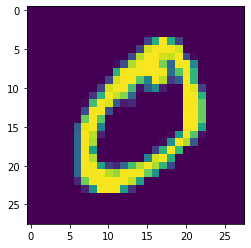

In [22]:
plt.imshow(X[1].reshape(28, 28))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(warm_start=True, n_jobs=5)
scores = cross_val_score(model, X, y, scoring="balanced_accuracy", cv=5)

scores

array([0.92103468, 0.92019465, 0.91410078, 0.9171928 , 0.92858182])

In [25]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [26]:
X_reduced.shape

(70000, 154)

In [27]:
model = LogisticRegression(warm_start=True, n_jobs=5)
scores = cross_val_score(model, X_reduced, y, scoring="balanced_accuracy", cv=5)

scores

array([0.91916782, 0.91815853, 0.91507496, 0.91625923, 0.92540215])

It is also possible to **decompress the reduced dataset back to 784 dimensions** by applying the **inverse transformation** of the PCA projection. This **won’t give you back the original data**, since the projection lost a bit of information (within the 5% variance that was dropped), but it will **likely be close to the original data**. The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the reconstruction error.

The following code compresses the MNIST dataset down to $154$ dimensions, then uses the `inverse_transform()` method to decompress it back to $784$ dimensions

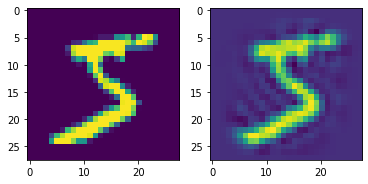

In [28]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

fig, ax = plt.subplots(1,2)

ax[0].imshow(X[0].reshape(28, 28))
ax[1].imshow(X_recovered[0].reshape(28, 28))

### Randomized PCA

If you set the `svd_solver` hyperparameter to "randomized", Scikit-Learn uses a **stochastic algorithm called Randomized PCA** that quickly finds an **approximation of the first $d$ principal components**. Its computational complexity is $O(m × d^2) + O(d^3)$, instead of $O(m × n^2) + O(n^3)$ for the full SVD approach, so it is dramatically faster than full SVD when $d$ is much smaller than $n$:

In [29]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)

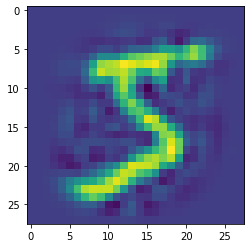

In [30]:
X_recovered = pca.inverse_transform(X_reduced)
plt.imshow(X_recovered[0].reshape(28, 28))

By default, `svd_solver` is actually set to "auto": Scikit-Learn automatically uses the randomized PCA algorithm if $m$ or $n$ is greater than $500$ and $d$ is less than $80$% of $m$ or $n$, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full SVD, you can set the svd_solver hyperparameter to "full".

### Incremental PCA

One problem with the preceding implementations of PCA is that they require the **whole training set** to fit in memory in order for the algorithm to run. Fortunately, **Incremental PCA (IPCA)** algorithms have been developed. They allow you to split the training set into **mini-batches** and feed an IPCA algorithm one mini-batch at a time. This is useful for large training sets and for applying PCA online (i.e., on the fly, as new instances arrive).

The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class5 to reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like before). Note that you must call the partial_fit() method with each mini-batch, rather than the fit() method with the whole training set:

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X)

## Kernel PCA

In Chapter 5 we discussed the **kernel trick**, a mathematical technique that implicitly maps instances into a **very high-dimensional space** (called the **feature space**), enabling **nonlinear classification and regression with Support Vector Machines**. Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space.

It turns out that the same trick can be applied to PCA, making it possible to perform **complex nonlinear projections for dimensionality reduction**. This is called Kernel PCA (kPCA). It is often **good at preserving clusters of instances after projection**, or sometimes even unrolling datasets that lie close to a twisted manifold.

Figure 8-10 shows the Swiss roll, reduced to two dimensions using a linear kernel (equivalent to simply using the PCA class), an RBF kernel, and a sigmoid kernel.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0810.png)

In [32]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=1, n_jobs=5)
X_reduced = rbf_pca.fit_transform(X)

In [31]:
model = LogisticRegression(warm_start=True, n_jobs=5)
scores = cross_val_score(model, X_reduced, y, scoring="balanced_accuracy", cv=5)

scores

/Users/miay/miniconda3/envs/ml-mit-python/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

### Selecting a Kernel and Tuning Hyperparameters

As kPCA is an **unsupervised learning algorithm**, there is **no obvious performance measure** to help you select the best kernel and hyperparameter values. That said, dimensionality reduction is often a **preparation step for a supervised learning task (e.g., classification)**, so you can use grid search to select the kernel and hyperparameters that lead to the best performance on that task. 

The following code creates a **two-step pipeline**, first **reducing dimensionality to two dimensions** using kPCA, then **applying Logistic Regression for classification**. Then it uses GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=15, n_informative=5, n_redundant=2, n_repeated=2, n_clusters_per_class=2, class_sep=1.1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
        ("kpca", KernelPCA()),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__n_components": range(2,10),
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6]);

In [ ]:
y = t > 6.9

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=10)

scores

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X, y)

In [ ]:
grid_search.best_score_

Another approach, this time entirely unsupervised, is to select the kernel and hyperparameters that yield the **lowest reconstruction error**. Note that reconstruction is not as easy as with linear PCA. Here’s why. Figure 8-11 shows the original Swiss roll 3D dataset (top left) and the resulting 2D dataset after kPCA is applied using an RBF kernel (top right). Thanks to the kernel trick, this transformation is mathematically equivalent to using the feature map φ to map the training set to an infinite-dimensional feature space (bottom right), then projecting the transformed training set down to 2D using linear PCA.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0811.png)

In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)